In [ ]:
from bisect import bisect_left
import numpy as np
import sys
import struct
from matplotlib import pyplot as plt
from matplotlib.gridspec import GridSpec
import matplotlib.lines as mlines
import TetrodeUtils as trode
import GeneralUtils as gu
import glob

In [111]:
ts, waveforms = trode.readTetrode('./RawData/Sc3.ntt')

spikes = trode.readTFile('./RawData/Sc3_02.t64')

Number of spikes: 13588
nspikes in tfile: 3247


In [112]:
smallwave = np.zeros([4,32,len(spikes)])

##find the nearest waveform timestamp to tfile timestamp
 
for indx, spike in enumerate(spikes):
 
    closest = gu.take_Closest(ts, spike*100)
    ts_index = np.where(ts==closest)[0]
   
    smallwave[:,:,indx]=waveforms[:,:,ts_index[0]]
  
  ##compute mean waveform for each channel
wave_mean = np.zeros([4,32])

for i in range(4):
     wave_mean[i,:] = np.mean(smallwave[i,:,:], axis=1)

In [113]:
biggest = np.argmax(np.max(wave_mean, axis=1))
print(biggest)

2


(-415.35663689559595, 493.5934708962119)

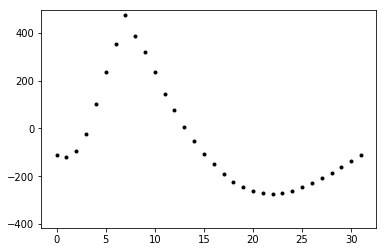

In [127]:
xvals = range(len(wave_mean[biggest,:]))
#xvals = [x/31. for x in xvals]

plt.plot(xvals, wave_mean[0,:], 'k.')
plt.ylim([plotmin, plotmax])

In [128]:
import scipy.interpolate as interp
##choose the biggest waveform to find FWHM
waveform = wave_mean[biggest,:]
##adjust the waveform baseline
peak = np.argmax(waveform)
baseline = np.min(waveform[:peak])
adjusted_waveform = waveform-baseline
print(np.shape(adjusted_waveform))
print(np.shape(xvals))
#create a super resolution waveform

(32,)
(32,)


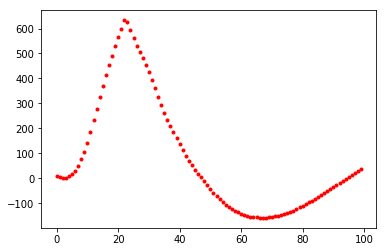

In [129]:
f1 = interp.interp1d(xvals, adjusted_waveform, kind='linear')
superx = np.linspace(0,31,100)

supery = f1(superx)
plt.plot(supery, 'r.')
plt.show()

In [133]:
##find the max
peakind = np.argmax(supery)
troughind = np.argmin(supery)

prepeak = supery[:peakind]
postpeak = supery[peakind:troughind]

half_max = supery[peakind]/2
print(half_max)

316.5333983506143


In [139]:
print(half_max)
#print(postpeak)
half_max_post = peakind + np.argmin(np.abs([val-half_max for val in postpeak]))
half_max_pre = np.argmin(np.abs([val-half_max for val in prepeak]))

316.5333983506143


In [ ]:
print(supery[half_max_post])
print(half_max_post)

print(supery[half_max_pre])
print(half_max_pre)

In [143]:
print((half_max_post - half_max_pre) * 10)
#100 = 1 ms each sample = .01 ms


190


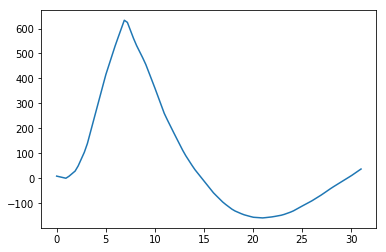

In [144]:
plt.plot(superx, supery)

In [154]:
a = ['x', 'b']
b = []
print(not a)
if (not b) | (not a):
    print("shit")

False
shit
